In [1]:
import os
import cv2
import numpy as np

#Encoding and Split data into Train/Test Sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

#Plot Images
import matplotlib.pyplot as plt


folder_dir = 'flowers'

In [2]:
data = []
label = []

SIZE = 128 #Crop the image to 128x128

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue

In [3]:
data_arr = np.array(data)
label_arr = np.array(label)

In [4]:
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,5)
X = data_arr/255

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [6]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

In [7]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

In [8]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=64
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_test,y_test),
                              verbose = 1)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/64
109/109 [==============================] - 396s 3s/step - loss: 1.5682 - accuracy: 0.2673 - val_loss: 1.2721 - val_accuracy: 0.4890
Epoch 2/64
109/109 [==============================] - 381s 4s/step - loss: 1.3556 - accuracy: 0.3955 - val_loss: 1.3080 - val_accuracy: 0.4220
Epoch 3/64
109/109 [==============================] - 375s 3s/step - loss: 1.3004 - accuracy: 0.4470 - val_loss: 1.1467 - val_accuracy: 0.5503
Epoch 4/64
109/109 [==============================] - 349s 3s/step - loss: 1.2265 - accuracy: 0.5026 - val_loss: 1.1135 - val_accuracy: 0.5445
Epoch 5/64
109/109 [==============================] - 346s 3s/step - loss: 1.1785 - accuracy: 0.5218 - val_loss: 1.0976 - val_accuracy: 0.5249
Epoch 6/64
109/109 [==============================] - 331s 3s/step - loss: 1.1376 - accuracy: 0.5353 - val_loss: 1.0142 - val_accuracy: 0.5919
Epoch 7/64
109/109 [==============================] - 329s 3s/step - loss: 1.1055 - accuracy: 0.5646 - val_loss: 1.0380 - val_accuracy: 0.5746

Epoch 58/64
109/109 [==============================] - 310s 3s/step - loss: 0.6751 - accuracy: 0.7404 - val_loss: 0.6220 - val_accuracy: 0.7572
Epoch 59/64
109/109 [==============================] - 307s 3s/step - loss: 0.6504 - accuracy: 0.7603 - val_loss: 0.6304 - val_accuracy: 0.7595
Epoch 60/64
109/109 [==============================] - 309s 3s/step - loss: 0.6145 - accuracy: 0.7670 - val_loss: 0.5992 - val_accuracy: 0.7676
Epoch 61/64
109/109 [==============================] - 303s 3s/step - loss: 0.6305 - accuracy: 0.7538 - val_loss: 0.6257 - val_accuracy: 0.7538
Epoch 62/64
109/109 [==============================] - 305s 3s/step - loss: 0.6187 - accuracy: 0.7672 - val_loss: 0.6517 - val_accuracy: 0.7503
Epoch 63/64
109/109 [==============================] - 304s 3s/step - loss: 0.5951 - accuracy: 0.7685 - val_loss: 0.6995 - val_accuracy: 0.7214
Epoch 64/64
109/109 [==============================] - 305s 3s/step - loss: 0.6051 - accuracy: 0.7769 - val_loss: 0.6166 - val_accuracy:

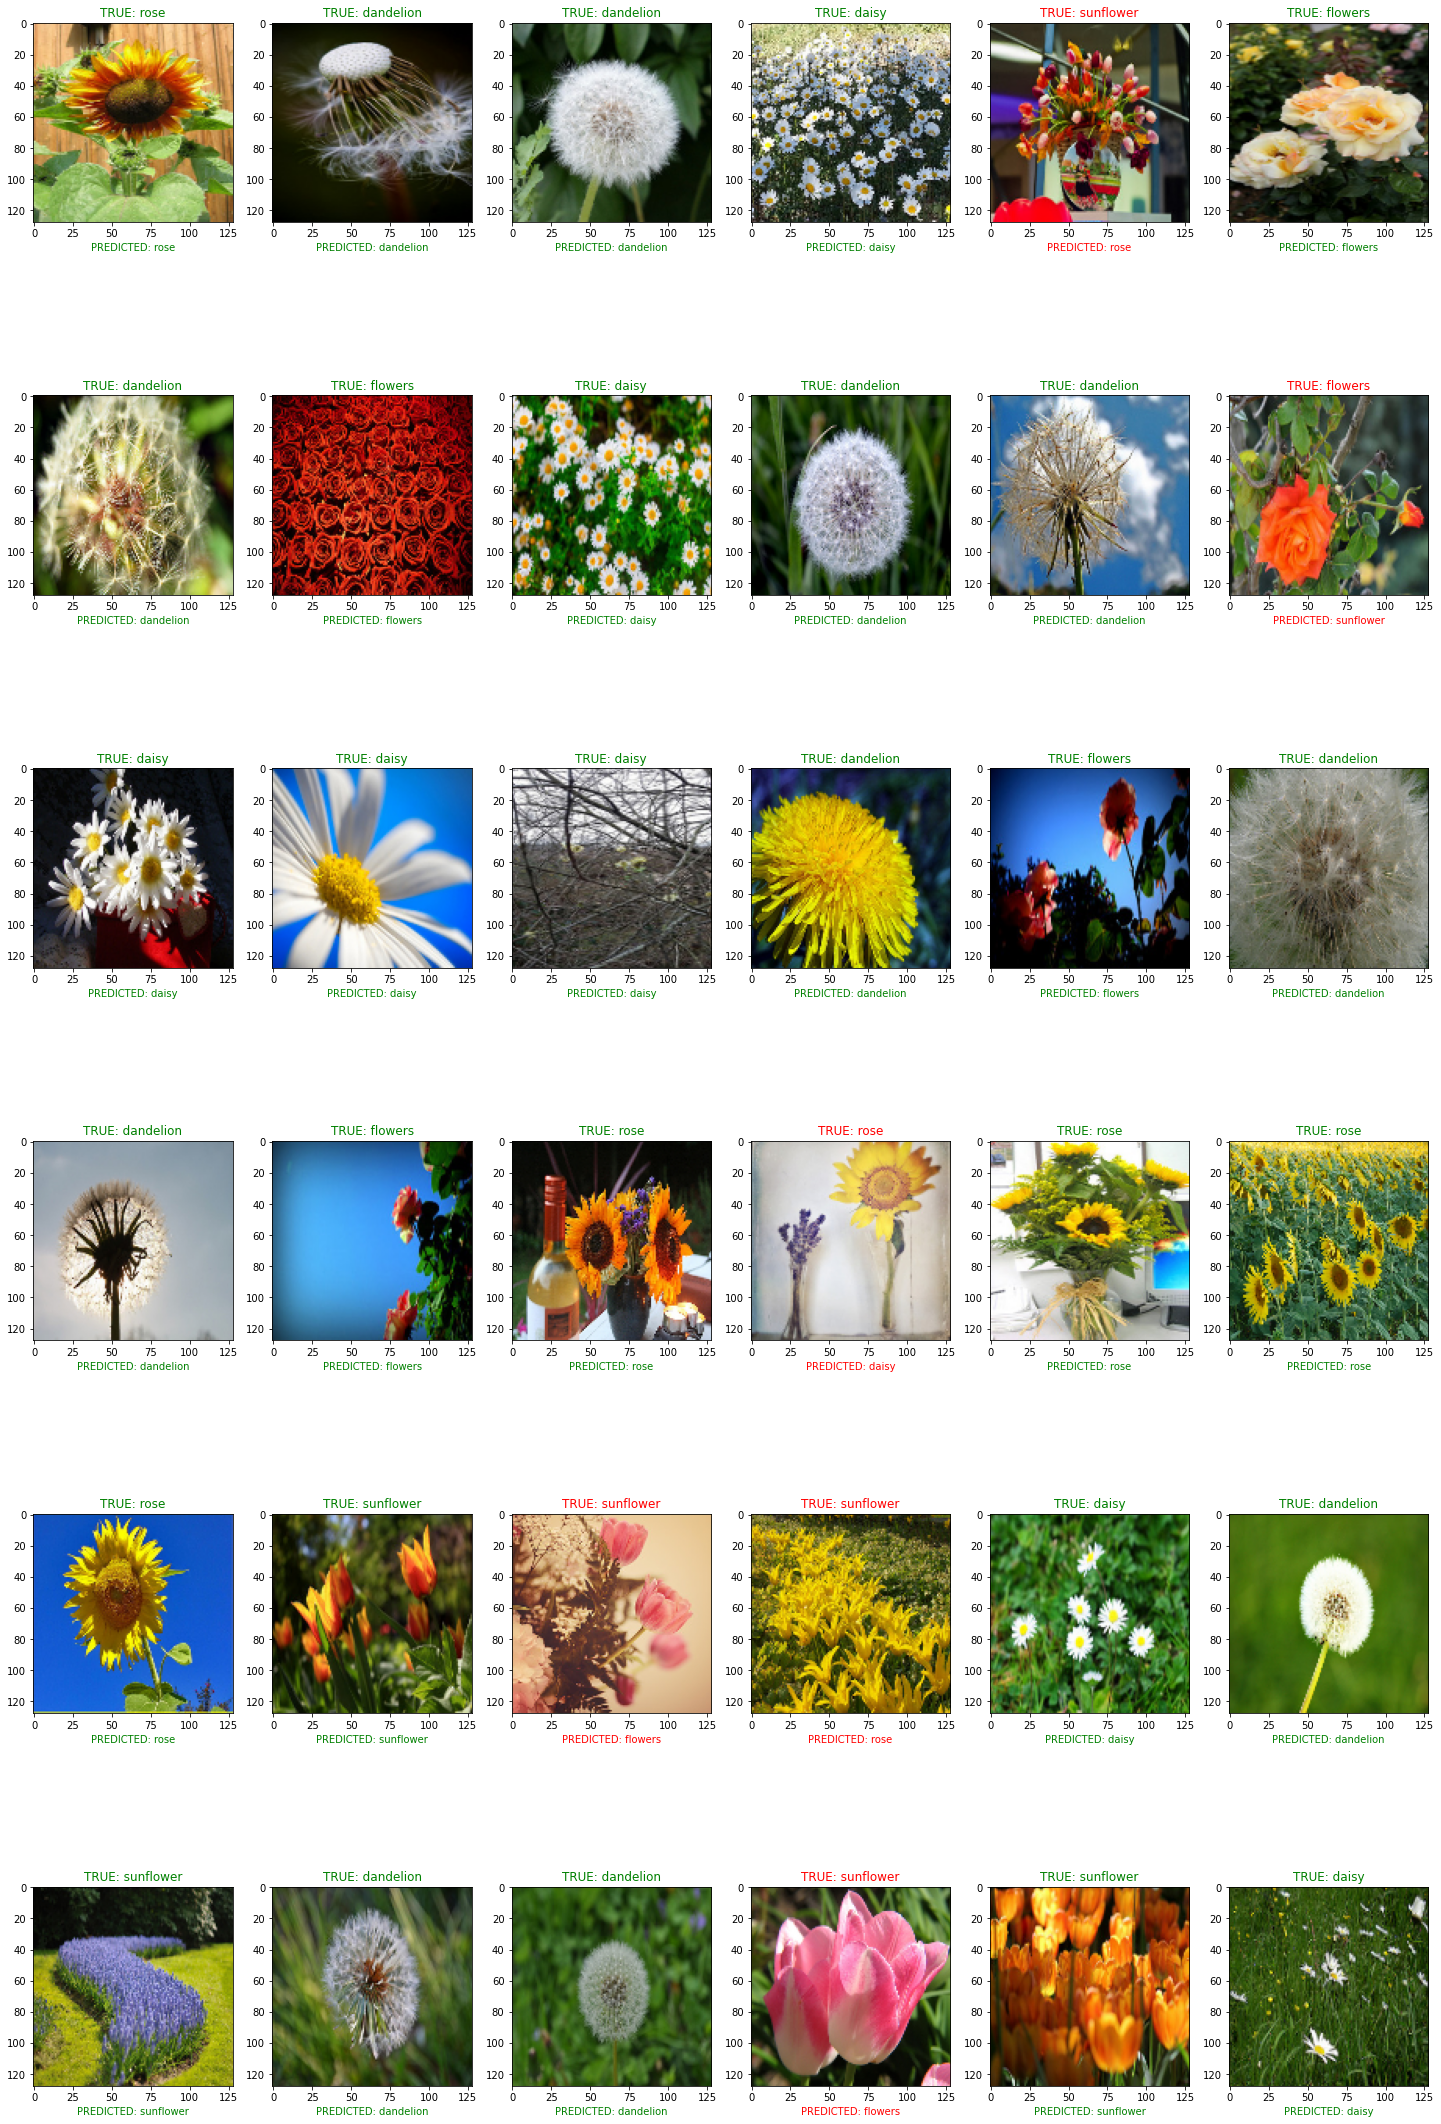

In [9]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')